In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set_style("darkgrid")
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs, make_classification
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Creating Dataset

In [4]:
companies = pd.read_csv("../Dataset/companies.csv")
companies.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [5]:
comb = pd.read_csv("../Dataset/2015 combined data.csv")
comb.head()

,CrunchBase Ranking,Company Name/Organisation Name,Acquired by,Location,Number of Employees,Industry,IPO Status,Founded Date,Headquarters Regions,Founders,...,Number of Diversity Investments,Number of Exits,Related Hubs,Investor Type,Stock Symbol,IPO Date,Number of Sub Organisations,Funding Rounds,Funds Raised (for VC),Number of Lead Investments
0,NaN,#fame,NaN,IND,NaN,Media,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,NaN,:Qounter,NaN,USA,NaN,Application Platforms|Real Time|Social Network...,NaN,4/9/2014,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,NaN,"(THE) ONE of THEM,Inc.",NaN,NaN,NaN,Apps|Games|Mobile,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,NaN,0-6.com,NaN,CHN,NaN,Curated Web,NaN,1/1/2007,Beijing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
4,NaN,004 Technologies,NaN,USA,NaN,Software,NaN,1/1/2010,"Springfield, Illinois",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [6]:
df1 = comb[["Company Name/Organisation Name","Operating Status","Last Funding Type","Total Funding Amount", "Number of Funding Rounds"]].copy()
df1

,Company Name/Organisation Name,Operating Status,Last Funding Type,Total Funding Amount,Number of Funding Rounds
0,#fame,operating,B,10000000.0,1.0
1,:Qounter,operating,A,700000.0,2.0
2,"(THE) ONE of THEM,Inc.",operating,B,3406878.0,1.0
3,0-6.com,operating,A,2000000.0,1.0
4,004 Technologies,operating,NaN,NaN,1.0
...,...,...,...,...,...
66363,ZZNode Science and Technology,operating,A,1587301.0,1.0
66364,Zzzzapp Wireless ltd.,operating,NaN,114304.0,4.0
66365,ÃERON,operating,A,NaN,1.0
66366,Ã”asys,operating,NaN,18192.0,1.0


In [7]:
df1_clean = df1.dropna()

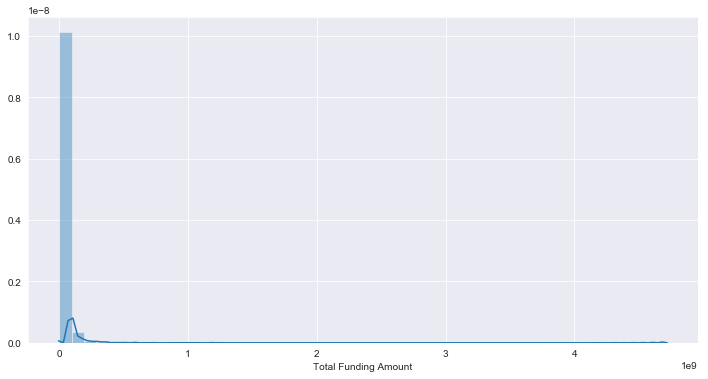

In [8]:
plt.figure(figsize = (12, 6))
sns.distplot(df1_clean["Total Funding Amount"])
# plt.xlabel("Number of Clusters")
#     plt.ylabel("WSS")
#     plt.xticks(np.arange(1, max_clusters+1, 1))
plt.show()

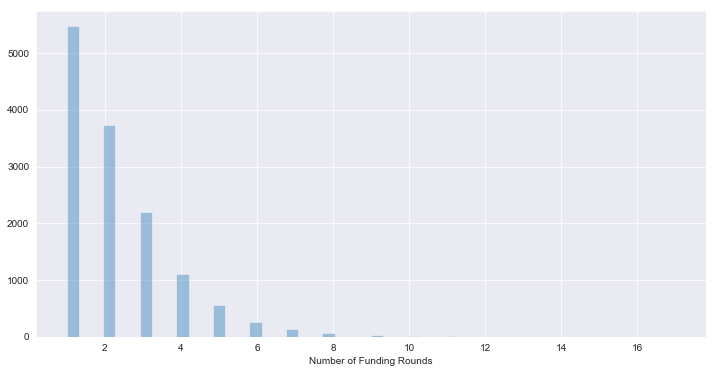

In [9]:
plt.figure(figsize = (12, 6))
sns.distplot(df1_clean["Number of Funding Rounds"], kde = False)
# plt.xlabel("Number of Clusters")
#     plt.ylabel("WSS")
#     plt.xticks(np.arange(1, max_clusters+1, 1))
plt.show()

In [10]:
features = df1_clean.iloc[:,1:]
features

,Operating Status,Last Funding Type,Total Funding Amount,Number of Funding Rounds
0,operating,B,10000000.0,1.0
1,operating,A,700000.0,2.0
2,operating,B,3406878.0,1.0
3,operating,A,2000000.0,1.0
7,operating,B,33600000.0,4.0
...,...,...,...,...
66353,operating,A,25000000.0,1.0
66354,operating,B,14750000.0,4.0
66360,acquired,A,8500000.0,1.0
66361,operating,A,2686600.0,1.0


In [11]:
kmeans_features = features.iloc[:,2:]
kmeans_features

,Total Funding Amount,Number of Funding Rounds
0,10000000.0,1.0
1,700000.0,2.0
2,3406878.0,1.0
3,2000000.0,1.0
7,33600000.0,4.0
...,...,...
66353,25000000.0,1.0
66354,14750000.0,4.0
66360,8500000.0,1.0
66361,2686600.0,1.0


In [12]:
feature_names = kmeans_features.columns.values

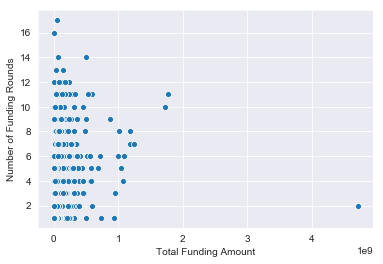

In [13]:
sns.scatterplot(x= "Total Funding Amount", y="Number of Funding Rounds", data= kmeans_features)

In [14]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(kmeans_features)

In [15]:
scaled_features[:5]

array([[-0.20767953, -0.81775313],
       [-0.3435854 , -0.16143862],
       [-0.30402834, -0.81775313],
       [-0.3245878 , -0.81775313],
       [ 0.13719986,  1.15119041]])

In [16]:
features

,Operating Status,Last Funding Type,Total Funding Amount,Number of Funding Rounds
0,operating,B,10000000.0,1.0
1,operating,A,700000.0,2.0
2,operating,B,3406878.0,1.0
3,operating,A,2000000.0,1.0
7,operating,B,33600000.0,4.0
...,...,...,...,...
66353,operating,A,25000000.0,1.0
66354,operating,B,14750000.0,4.0
66360,acquired,A,8500000.0,1.0
66361,operating,A,2686600.0,1.0


In [17]:
cat_var = pd.get_dummies(features["Last Funding Type"], prefix= "Funding_")
cat_var

,Funding__A,Funding__B,Funding__C,Funding__D,Funding__E,Funding__F,Funding__G,Funding__H
0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
66353,1,0,0,0,0,0,0,0
66354,0,1,0,0,0,0,0,0
66360,1,0,0,0,0,0,0,0
66361,1,0,0,0,0,0,0,0


In [18]:
df = pd.concat([features.drop("Last Funding Type", axis= 1), cat_var], axis= 1)

In [19]:
enc = OneHotEncoder(handle_unknown='ignore')

In [20]:
features.values[:,0:2]

array([['operating', 'B'],
       ['operating', 'A'],
       ['operating', 'B'],
       ...,
       ['acquired', 'A'],
       ['operating', 'A'],
       ['operating', 'A']], dtype=object)

In [21]:
enc.fit(features.values[:,0:2])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)

In [22]:
cat_var = enc.transform(features.values[:,0:2]).toarray()

In [23]:
df

,Operating Status,Total Funding Amount,Number of Funding Rounds,Funding__A,Funding__B,Funding__C,Funding__D,Funding__E,Funding__F,Funding__G,Funding__H
0,operating,10000000.0,1.0,0,1,0,0,0,0,0,0
1,operating,700000.0,2.0,1,0,0,0,0,0,0,0
2,operating,3406878.0,1.0,0,1,0,0,0,0,0,0
3,operating,2000000.0,1.0,1,0,0,0,0,0,0,0
7,operating,33600000.0,4.0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
66353,operating,25000000.0,1.0,1,0,0,0,0,0,0,0
66354,operating,14750000.0,4.0,0,1,0,0,0,0,0,0
66360,acquired,8500000.0,1.0,1,0,0,0,0,0,0,0
66361,operating,2686600.0,1.0,1,0,0,0,0,0,0,0


In [24]:
X = df.drop("Operating Status", axis = 1).values

In [25]:
X

array([[1.000000e+07, 1.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [7.000000e+05, 2.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [3.406878e+06, 1.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [8.500000e+06, 1.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.686600e+06, 1.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.587301e+06, 1.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]])

In [26]:
X[:,:2]

array([[1.000000e+07, 1.000000e+00],
       [7.000000e+05, 2.000000e+00],
       [3.406878e+06, 1.000000e+00],
       ...,
       [8.500000e+06, 1.000000e+00],
       [2.686600e+06, 1.000000e+00],
       [1.587301e+06, 1.000000e+00]])

In [27]:
X_scaled = scaler.fit_transform(X[:,:2])

In [28]:
X_final = np.concatenate([X_scaled, X[:, 2:]], axis = 1)

In [29]:
X_final

array([[-0.20767953, -0.81775313,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.3435854 , -0.16143862,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.30402834, -0.81775313,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.22959983, -0.81775313,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.31455415, -0.81775313,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.33061879, -0.81775313,  1.        , ...,  0.        ,
         0.        ,  0.        ]])

In [30]:
n_clusters = 4
n_init = 10
max_iter = 300
random_state = 42

kmeans = KMeans(
    init = "random",
    n_clusters = n_clusters,
    n_init = n_init,
    random_state = random_state)

In [31]:
kmeans.fit(X_final[:, 2:])

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [32]:
pred = kmeans.predict(X_final[:, 2:])

In [33]:
#kmeans_visual(X_final[:, 2:], pred, kmeans.cluster_centers_, 1, 2)

# Hierarchical Clustering

In [84]:
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Creating a Dendrogram 
def dendrogram_visual(X):
    data_scaled = normalize(X)
    
    # Creating the linkage matrix
    linked = linkage(data_scaled, method = "ward", metric = "euclidean")
    print("Created linkage matrix")
    
    # Plotting the dendrogram
    plt.figure(figsize = (12, 6))
    plt.title("Dendrogram")
    plt.ylabel("Distance")
    dend = dendrogram(linked, orientation= 'top', labels= labelList, 
                  distance_sort = "descending", show_leaf_counts = True)
    plt.show()

# Visualising the clusters    
def hierarchical_visual(X, label, x1, x2, feature_names = None, 
                        scaled = True, scaler = None):
    
    limit = scaled_features.shape[1]

    if (x1 > limit or x2 > limit):
        print("Invalid feature selected")
        return None
    
    # Changing the selected feature to column index
    x1 = x1 - 1
    x2 = x2 - 1
    
    # Whether to plot to actual scale
    if (scaled and scaler):
        X = scaler.inverse_transform(X)
        
    plt.figure(figsize = (12, 6))
    
    sns.scatterplot(x = X[:, x1].reshape(-1),y = X[:, x2].reshape(-1), hue = label,
                    alpha = 0.7,
                palette = sns.color_palette("Set2", n_colors=len(np.unique(lab))))

    #sns.scatterplot(centers[:, x1].reshape(-1), centers[:, x2].reshape(-1),
                   #color = 'black', s = 200, alpha = 0.5)
    
    if feature_names != None:
        plt.xlabel(feature_names[x1])
        plt.ylabel(feature_names[x2])
        
    plt.show()

In [164]:
data_scaled = normalize(X_final)

In [166]:
data_scaled

array([[-0.15873062, -0.62501327,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.32121822, -0.15092907,  0.93490067, ...,  0.        ,
         0.        ,  0.        ],
       [-0.22909493, -0.61620273,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.17499518, -0.62327074,  0.7621747 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.23658952, -0.61506681,  0.75214242, ...,  0.        ,
         0.        ,  0.        ],
       [-0.24794658, -0.61327152,  0.74994702, ...,  0.        ,
         0.        ,  0.        ]])

Created linkage matrix


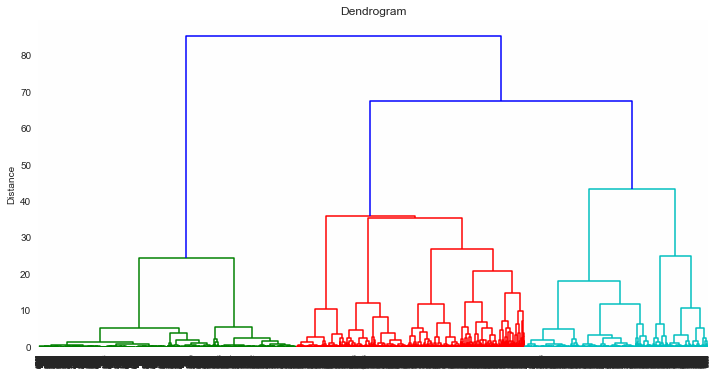

In [104]:
dendrogram_visual(data_scaled)

In [167]:
cluster = AgglomerativeClustering(n_clusters = 3, affinity= "euclidean",
                                 linkage = "ward")
cluster.fit_predict(data_scaled)

array([0, 1, 0, ..., 1, 1, 1])

In [176]:
lab = cluster.labels_
len(np.unique(lab))

3

In [177]:
unique, count = np.unique(lab, return_counts = True)
freq = np.asarray((unique, count))
print(freq)

[[   0    1    2]
 [3728 5246 4637]]


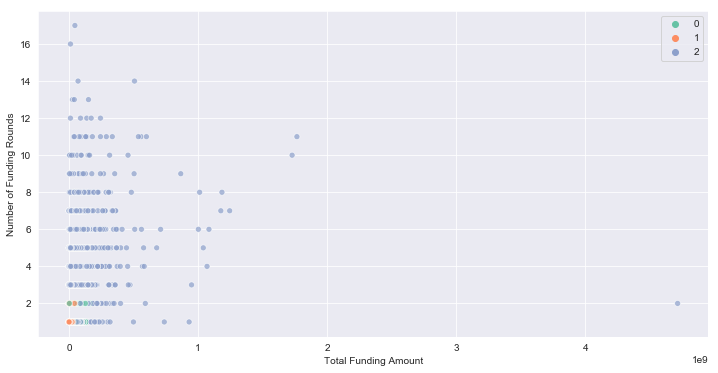

In [175]:
hierarchical_visual(X, lab, 1, 2, 
                    ['Total Funding Amount', 'Number of Funding Rounds'])

# Pre-processing 

### 1) Using the Elbow Method to determine number of clusters

In [42]:
# Pick the cluster with the last significant decrease in WSS score
# (Reasonable trade-off between error and number of clusters)

def elbow_method(scaled_features, max_clusters):
    WSS = []
    
    for cluster in range(1, max_clusters):
        kmeans = KMeans(init = "k-means++", n_clusters = cluster,
                        n_init = 10, random_state = 42)
        kmeans.fit(scaled_features)
        WSS.append(kmeans.inertia_)

    frame = pd.DataFrame(data = {"Clusters": range(1,max_clusters), "WSS": WSS})
    plt.figure(figsize = (12, 6))
    sns.lineplot(frame["Clusters"], frame["WSS"], marker = "o")
    plt.xlabel("Number of Clusters")
    plt.ylabel("WSS")
    plt.xticks(np.arange(1, max_clusters+1, 1))
    plt.show()

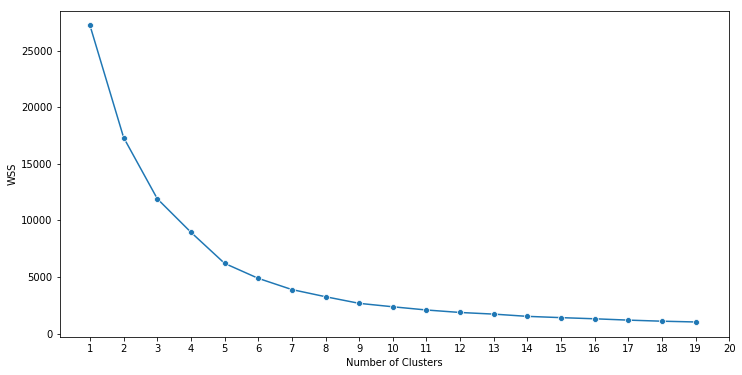

In [43]:
elbow_method(scaled_features, 20)

### 2) Using the Silhouette Coefficient Method

In [44]:
# Pick the cluster with the maximum score

def silhouette_method(scaled_features, max_clusters):
    silhouette_coef = []
    
    # We start at 2 clusters for silhouette coefficient
    for cluster in range(2, max_clusters):
        kmeans = KMeans(init = "k-means++", n_clusters = cluster,
                        n_init = 10, random_state = 42)
        kmeans.fit(scaled_features)
        score = silhouette_score(scaled_features, kmeans.labels_)
        silhouette_coef.append(score)

    frame = pd.DataFrame(data = {"Clusters": range(2,max_clusters), 
                                 "Silhouette Coefficient": silhouette_coef})
    plt.figure(figsize = (12, 6))
    sns.lineplot(frame["Clusters"], 
                 frame["Silhouette Coefficient"], marker = "o")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Coefficient")
    plt.xticks(np.arange(2, max_clusters+1, 1))
    plt.show()

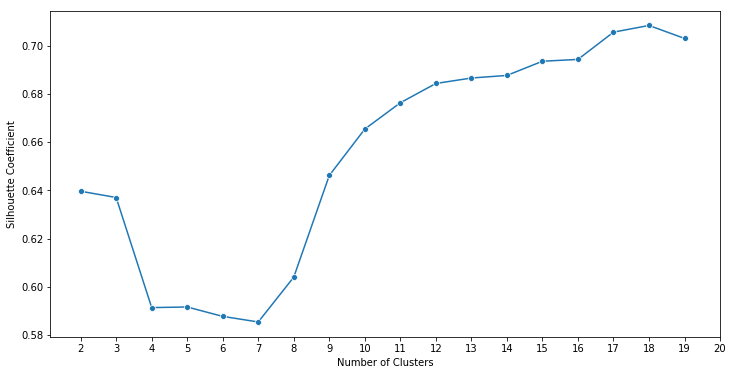

In [45]:
silhouette_method(scaled_features, 20)

# KMeans with 4 Clusters

Setting number of clusters to 4

In [44]:
n_clusters = 4
n_init = 10
max_iter = 300
random_state = 42

kmeans = KMeans(
    init = "random",
    n_clusters = n_clusters,
    n_init = n_init,
    random_state = random_state)

In [45]:
kmeans.fit(scaled_features)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [46]:
kmeans.inertia_

8947.859595076048

# Results from KMeans

In [47]:
pred = kmeans.predict(scaled_features)

# Interpreting Results

In [53]:
scaled_features.shape[0]

13611

In [34]:
def kmeans_visual(X, pred, centers, x1, x2, feature_names = np.array([]), scaled = True, scaler = None):
    limit = scaled_features.shape[1]

    if (x1 > limit or x2 > limit):
        print("Invalid feature selected")
        return None
    
    # Changing the selected feature to column index
    x1 = x1 - 1
    x2 = x2 - 1
    
    # Whether to plot to actual scale
    if (scaled and scaler):
        centers = scaler.inverse_transform(centers)
        
    plt.figure(figsize = (12, 6))
    
    sns.scatterplot(x = X[:, x1].reshape(-1),y = X[:, x2].reshape(-1),hue = pred,
                palette = sns.color_palette("Set2", n_colors=len(centers)))

    sns.scatterplot(centers[:, x1].reshape(-1), centers[:, x2].reshape(-1),
                   color = 'black', s = 200, alpha = 0.5)
    
    if feature_names.any():
        plt.xlabel(feature_names[x1])
        plt.ylabel(feature_names[x2])
        
    plt.show()
    
# Interpreting the cluster centroids
def centroid_position(centers, columns):
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    # pd.reset_option('display.float_format')
    centers = pd.DataFrame(centers, columns= feature_names)
    print(centers)

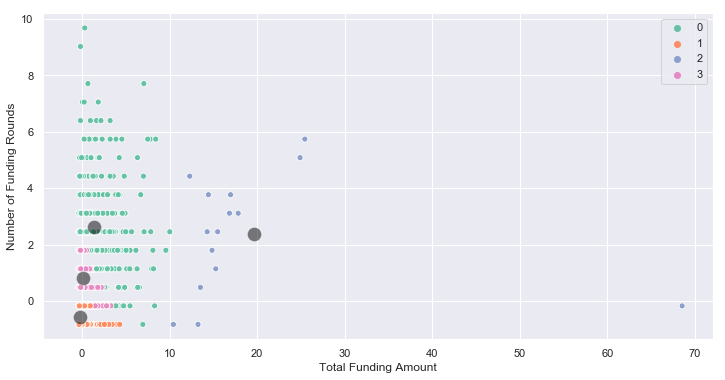

In [195]:
kmeans_visual(scaled_features, pred, kmeans.cluster_centers_, 1, 2, feature_names)

In [96]:
kmeans.cluster_centers_

array([[ 1.33091958,  2.64144967],
       [-0.17797096, -0.55323719],
       [19.633807  ,  2.37631084],
       [ 0.07956522,  0.81230788]])

In [198]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pd.reset_option('display.float_format')
centers = pd.DataFrame(data= scaler.inverse_transform(kmeans.cluster_centers_), columns= feature_names)

MILLION = 1000000
centers["Total Funding Amount"] = centers["Total Funding Amount"] / MILLION

centers.rename(columns={'Total Funding Amount': 'Total Funding Amount (mil)'}, inplace=True)

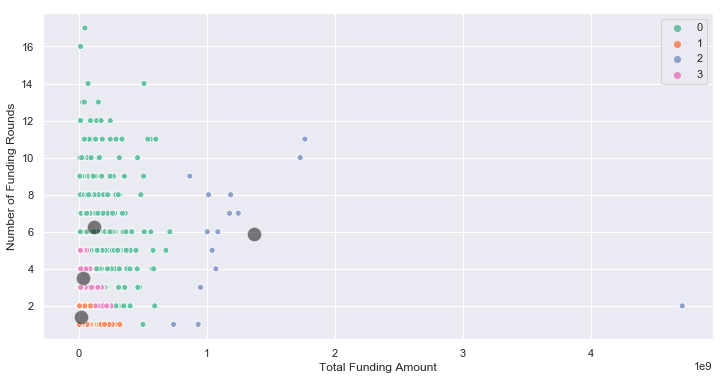

In [196]:
kmeans_visual(scaler.inverse_transform(scaled_features), pred, scaler.inverse_transform(kmeans.cluster_centers_)
              , 1, 2, feature_names)

In [197]:
centers

,Total Funding Amount (mil),Number of Funding Rounds
0,115.286,6.271
1,12.033,1.403
2,1367.747,5.867
3,29.656,3.484


There seems to be 4 clusters. With 3 clusters raising relatively lower amounts and 1 cluster with very high investments. Among the 3 clusters with lower amounts raised, they have different number of funding rounds of 1.4, 3.4 and 6.27.

In [70]:
results = pd.DataFrame(data = kmeans.cluster_centers_, columns= feature_names)

In [71]:
results

,Total Funding Amount,Number of Funding Rounds
0,1.330920,2.641450
1,-0.177971,-0.553237
2,19.633807,2.376311
3,0.079565,0.812308


# KMeans with 5 Clusters

Setting number of clusters to 5

In [14]:
n_clusters = 5
n_init = 10
max_iter = 300
random_state = 42

kmeans = KMeans(
    init = "random",
    n_clusters = n_clusters,
    n_init = n_init,
    random_state = random_state)

In [15]:
kmeans.fit(scaled_features)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [16]:
kmeans.inertia_

7598.375650802805

# Results from KMeans

In [17]:
pred = kmeans.predict(scaled_features)

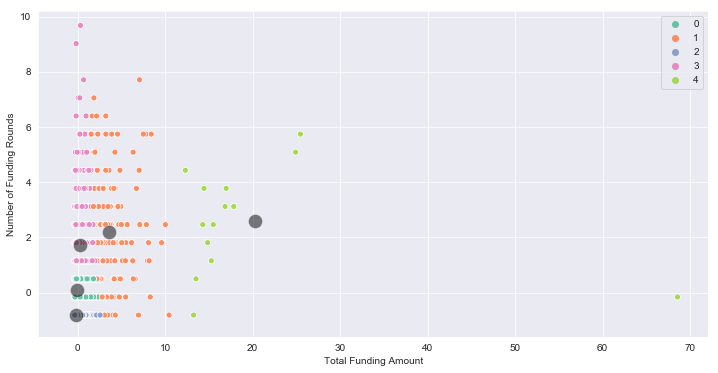

In [29]:
kmeans_visual(scaled_features, pred, kmeans.cluster_centers_, 1, 2, feature_names)

In [21]:
kmeans.cluster_centers_

array([[-0.06797203,  0.08075413],
       [ 3.56330029,  2.1788829 ],
       [-0.21273867, -0.81775313],
       [ 0.27037488,  1.72897985],
       [20.29010846,  2.60445826]])

In [22]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pd.reset_option('display.float_format')
centers = pd.DataFrame(data= scaler.inverse_transform(kmeans.cluster_centers_), columns= feature_names)

MILLION = 1000000
centers["Total Funding Amount"] = centers["Total Funding Amount"] / MILLION

centers.rename(columns={'Total Funding Amount': 'Total Funding Amount (mil)'}, inplace=True)

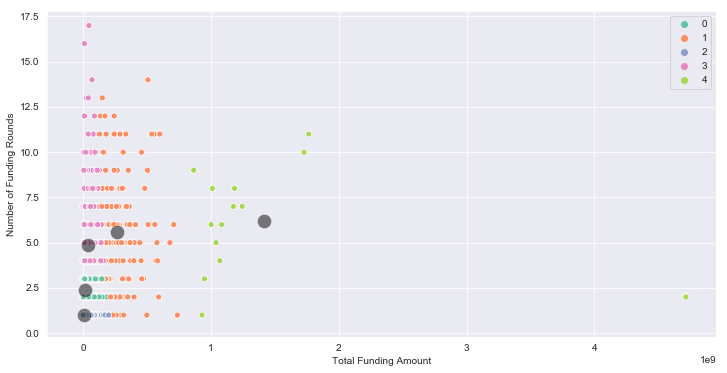

In [30]:
kmeans_visual(scaler.inverse_transform(scaled_features), pred, scaler.inverse_transform(kmeans.cluster_centers_)
              , 1, 2, feature_names)

In [24]:
centers

,Total Funding Amount (mil),Number of Funding Rounds
0,19.560,2.369
1,268.047,5.566
2,9.654,1.000
3,42.713,4.880
4,1412.658,6.214


# Comparing KMeans with Cluster 4 - 7

Setting number of clusters to 4, 5, 6 and 7

In [14]:
# n_clusters = 4
n_init = 10
max_iter = 300
random_state = 42

# Setting 4 clusters
kmeans4 = KMeans(
    init = "random",
    n_clusters = 4,
    n_init = n_init,
    random_state = random_state)

# Setting 5 clusters
kmeans5 = KMeans(
    init = "random",
    n_clusters = 5,
    n_init = n_init,
    random_state = random_state)

# Setting 6 clusters
kmeans6 = KMeans(
    init = "random",
    n_clusters = 6,
    n_init = n_init,
    random_state = random_state)

# Setting 7 clusters
kmeans7 = KMeans(
    init = "random",
    n_clusters = 7,
    n_init = n_init,
    random_state = random_state)


In [ ]:
models = [kmeans4, kmeans5, kmeans6, kmeans7]

In [25]:
for model in models:
    model.fit(scaled_features)

In [26]:
for model in models:
    print(model.inertia_)

8947.859595076048
7598.375650802805
5230.701199813408
3913.34237225714


In [43]:
# Prediction from models

model_predictions = []

for model in models:
    pred = model.predict(scaled_features)
    model_predictions.append(pred)

## Visualisation of KMeans with Clusters 4 - 7

In [56]:
plotting_features = kmeans_features

In [58]:
plotting_features

,Total Funding Amount,Number of Funding Rounds
0,10000000.000,1.000
1,700000.000,2.000
2,3406878.000,1.000
3,2000000.000,1.000
7,33600000.000,4.000
...,...,...
66353,25000000.000,1.000
66354,14750000.000,4.000
66360,8500000.000,1.000
66361,2686600.000,1.000


In [60]:
MILLION = 1000000

plotting_features["Total Funding Amount"] = plotting_features["Total Funding Amount"] / MILLION

In [61]:
plotting_features

,Total Funding Amount,Number of Funding Rounds
0,10.000,1.000
1,0.700,2.000
2,3.407,1.000
3,2.000,1.000
7,33.600,4.000
...,...,...
66353,25.000,1.000
66354,14.750,4.000
66360,8.500,1.000
66361,2.687,1.000


In [84]:
# Scaling the model centres to be in MILLIONS
model_centres = []

for model in models:
    centres = scaler.inverse_transform(model.cluster_centers_)
    centres[:,0]  = centres[:, 0] / MILLION
    model_centres.append(centres)

In [78]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pd.reset_option('display.float_format')

# Packaging model, their respective predictions and their centres

collection = models.copy()

for i in range(len(model_predictions)):
    collection[i] = [collection[i], model_predictions[i], model_centres[i]]

Scatterplot with 4 clusters


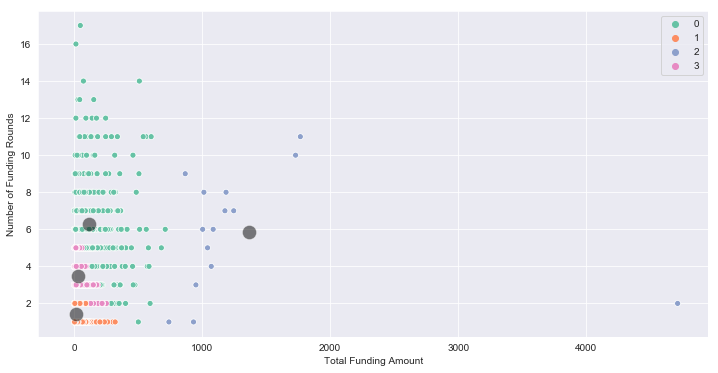

Scatterplot with 5 clusters


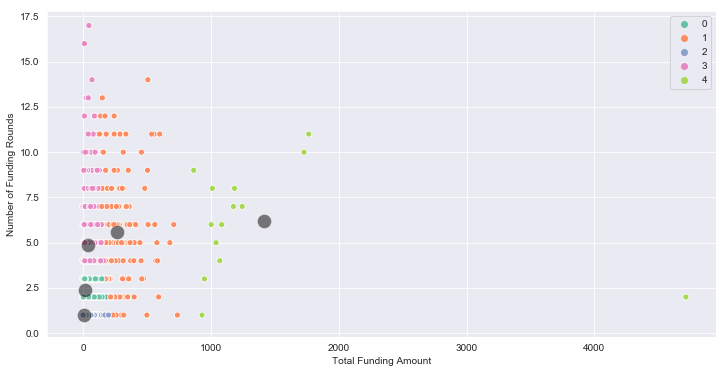

Scatterplot with 6 clusters


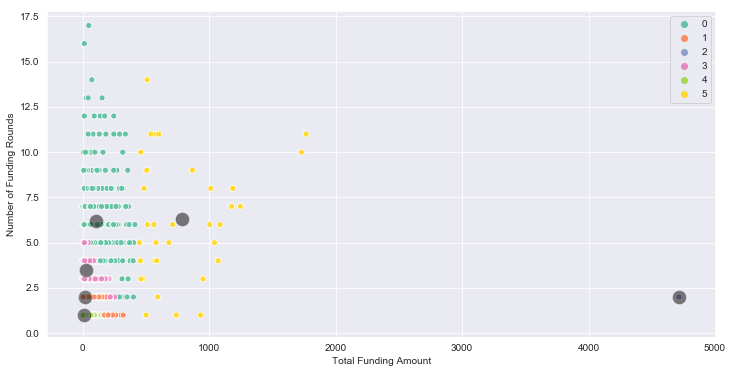

Scatterplot with 7 clusters


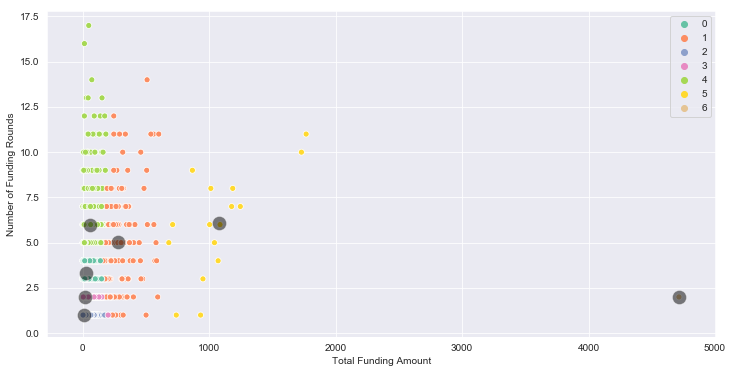

In [88]:
# Plotting scatterplot for KMeans with Clusters 4 - 7
numCluster = 4

for model, pred, centres in collection:
    i = 0
    print('Scatterplot with ' + str(numCluster) + " clusters")
    kmeans_visual(plotting_features.values, pred, centres, 1, 2, feature_names)

    numCluster += 1

## Displaying Cluster Centers Location

In [42]:
MILLION = 1000000

numCluster = 4

for model, pred in collection:
    
    print('Scatterplot with ' + str(numCluster) + " clusters")


    centers = pd.DataFrame(data= scaler.inverse_transform(model.cluster_centers_), columns= feature_names)
    
    centers["Total Funding Amount"] = centers["Total Funding Amount"] / MILLION

    centers.rename(columns={'Total Funding Amount': 'Total Funding Amount (mil)'}, inplace=True)
    
    print(centers)
    print("\n")
    
    numCluster += 1

Scatterplot with 4 clusters
   Total Funding Amount (mil)  Number of Funding Rounds
0                     115.286                     6.271
1                      12.033                     1.403
2                    1367.747                     5.867
3                      29.656                     3.484


Scatterplot with 5 clusters
   Total Funding Amount (mil)  Number of Funding Rounds
0                      19.560                     2.369
1                     268.047                     5.566
2                       9.654                     1.000
3                      42.713                     4.880
4                    1412.658                     6.214


Scatterplot with 6 clusters
   Total Funding Amount (mil)  Number of Funding Rounds
0                     101.762                     6.224
1                      16.636                     1.997
2                    4715.000                     2.000
3                      28.675                     3.478
4               

### Rough Workings

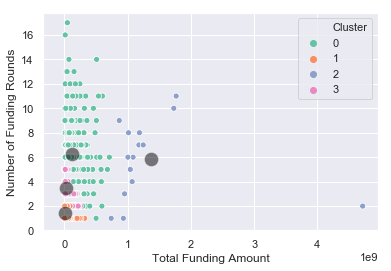

In [113]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

sns.scatterplot(x="Total Funding Amount",y="Number of Funding Rounds",data=test1,hue='Cluster',
                palette=sns.color_palette("Set2", n_colors=4))

sns.scatterplot(centers[:, 0].reshape(-1), centers[:, 1].reshape(-1),
                   color = 'black', s = 200, alpha = 0.5)

In [148]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pd.reset_option('display.float_format')
centers = pd.DataFrame(data= scaler.inverse_transform(kmeans.cluster_centers_), columns= feature_names)

In [149]:
MILLION = 1000000
centers["Total Funding Amount"] = centers["Total Funding Amount"] / MILLION

In [150]:
centers.rename(columns={'Total Funding Amount': 'Total Funding Amount (mil)'}, inplace=True)

In [151]:
centers

,Total Funding Amount (mil),Number of Funding Rounds
0,115.286,6.271
1,12.033,1.403
2,1367.747,5.867
3,29.656,3.484


In [70]:
results = pd.DataFrame(data = kmeans.cluster_centers_, columns= feature_names)

In [71]:
results

,Total Funding Amount,Number of Funding Rounds
0,1.330920,2.641450
1,-0.177971,-0.553237
2,19.633807,2.376311
3,0.079565,0.812308
